# **Fase de Modelado**

La etapa de modelado tiene como objetivo construir, entrenar y evaluar algoritmos de aprendizaje supervisado capaces de predecir la variable objetivo a partir del conjunto de datos previamente preparado. En esta fase se seleccionan las técnicas de modelado más adecuadas, se ajustan sus parámetros y se valida su desempeño mediante métricas cuantitativas.

Durante esta etapa se desarrollan las siguientes actividades principales:

1. **Selección del modelo:** identificación de los algoritmos más apropiados según la naturaleza del problema, las características del dataset y los objetivos del análisis.

2. **Entrenamiento del modelo:** ajuste de los parámetros internos de cada algoritmo utilizando el conjunto de entrenamiento para aprender los patrones subyacentes en los datos.

3. **Ajuste de hiperparámetros:** optimización de variables externas al modelo mediante técnicas como validación cruzada, grid search o random search, con el fin de mejorar la precisión y la capacidad de generalización.

4. **Evaluación del desempeño:** análisis de métricas como exactitud, precisión, recall, F1-score, matriz de confusión o AUC-ROC para determinar la eficacia predictiva y detectar posibles sesgos.

5. **Comparación de modelos:** contraste del rendimiento entre diferentes algoritmos para seleccionar la opción más robusta y estable.

6. **Validación final:** comprobación del modelo seleccionado utilizando el conjunto de prueba, garantizando que su rendimiento sea consistente y no esté afectado por sobreajuste.

Esta etapa permite obtener un modelo predictivo confiable, optimizado y validado, capaz de generalizar adecuadamente a nuevos datos y aportar valor en la toma de decisiones basada en aprendizaje automático.

In [1]:
# 1. Gestión de Librerias
import pandas as pd
import numpy as np

In [2]:
# 2. Carga del dataset desde su fuente
url = "https://github.com/aperezn298/CienciaDatosSENA/raw/refs/heads/main/04Datasets/hepatitis_processing.xlsx"
dataset = pd.read_excel(url)

dataset.head()

,Age,Sex,Estado_Civil,Ciudad,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,...,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology,Class
0,-1.175998,-3.791438,0.615075,1.639107,-0.956771,0.460242,1.811474,1.111732,0.652871,-2.862065,...,1.002974,0.618604,0.533398,-0.537257,-0.426177,-1.256193,0.663224,0.999303,-0.9759,2
1,0.585850,0.263752,-1.186216,-1.370000,-0.956771,0.460242,-0.587229,1.111732,0.652871,-2.862065,...,1.002974,0.618604,0.533398,-0.635752,1.337828,-0.584842,-0.251901,0.999303,-0.9759,2
2,3.052437,0.263752,-0.285571,0.435464,1.202104,0.460242,-0.587229,1.111732,0.652871,0.358574,...,1.002974,0.618604,0.533398,-0.832743,-0.038096,-0.864572,0.663224,0.999303,-0.9759,2
3,-1.087905,0.263752,1.515721,-0.768179,1.202104,-2.172770,1.811474,1.111732,0.652871,0.358574,...,1.002974,0.618604,0.533398,-0.832743,-1.802102,-0.305112,0.663224,0.999303,-0.9759,2
4,-0.823628,0.263752,0.615075,-0.166357,1.202104,0.460242,1.811474,1.111732,0.652871,0.358574,...,1.002974,0.618604,0.533398,-0.537257,-0.426177,-0.221193,0.663224,0.999303,-0.9759,2


### Act 01 - **Selección del Modelo**

In [3]:
# 1. Separar las características y la variable objetivo
X = dataset.drop("Class", axis=1)
y = dataset["Class"]

En el desarrollo de modelos de inteligencia artificial, es fundamental evaluar su capacidad para aprender y generalizar correctamente. Para ello, el conjunto de datos se divide en dos partes principales: entrenamiento (*training set*) y prueba (*test set*). Esta división permite medir el desempeño real del modelo frente a información nueva que no ha visto durante el entrenamiento.

Las proporciones más utilizadas son *80/20* o *70/30*, donde el **80%** o **70%** de los datos se emplea para entrenar el modelo y el 20% o 30% restante se reserva para su validación y evaluación final.

- **Conjunto de entrenamiento:** permite al modelo aprender los patrones y relaciones entre las variables de entrada y la variable objetivo.

- **Conjunto de prueba:** evalúa la capacidad del modelo para generalizar, es decir, su rendimiento ante datos desconocidos.

---

**random_state** es un parámetro que controla la aleatoriedad interna de un modelo o de un proceso en scikit-learn.
Su función es fijar una semilla (seed) para que los resultados que dependen del azar puedan reproducirse exactamente cada vez que se ejecuta el código.

In [4]:
# Definir una semilla aleatoria para reproducibilidad
RANDOM_SEED = 42

In [5]:
# 2. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [6]:
# 3. Definición del clasificador - Regresion Logística

# Importar los clasificadores desde scikit-learn
from sklearn.linear_model import LogisticRegression

# Crear un diccionario de clasificadores
model_rl = LogisticRegression(random_state=RANDOM_SEED)

### Act 02 - **Entrenamiento del Modelo**

En el desarrollo de modelos de inteligencia artificial, evaluar el rendimiento con una sola división de datos (como 80/20) puede generar resultados poco representativos. Para obtener una estimación más confiable y generalizable del desempeño, se aplica la validación cruzada, que evalúa el modelo en múltiples particiones del conjunto de datos.

La validación cruzada consiste en entrenar y evaluar el modelo varias veces sobre diferentes subconjuntos del conjunto de datos, asegurando que cada registro sea usado tanto para entrenamiento como para validación en algún momento.
De esta manera, se obtiene una medida más confiable del rendimiento promedio del modelo, al mismo tiempo que se disminuye el riesgo de sobreajuste (overfitting) y se mejora la capacidad de generalización.

El K-Fold Cross Validation divide el conjunto de entrenamiento en K partes de igual tamaño. En cada iteración, el modelo se entrena con K−1 particiones y se valida con la restante. Este proceso se repite K veces, y el promedio de las métricas obtenidas ofrece una estimación más estable y confiable del rendimiento del modelo.


| Tipo de dataset                             | Recomendación                                  |
| ------------------------------------------- | ---------------------------------------------- |
| Dataset **mediano a grande (≥ 1000 filas)** | **k = 5** (por defecto en scikit-learn)        |
| Dataset **pequeño (< 1000 filas)**          | **k = 10**                                     |
| Dataset **muy grande (> 100k filas)**       | **k = 3** o incluso usar **train/test simple** |


In [7]:
# 4. Validación cruzada en el conjunto de entrenamiento
from unicodedata import name
from sklearn.model_selection import cross_validate

scoring = ["accuracy", "precision", "recall", "f1"]
cv_scores = cross_validate(model_rl, X_train, y_train, cv=10, scoring=scoring, n_jobs=-1, return_train_score=False)

print("Resultados Validación Cruzada")
for metric in scoring:
    mean_score = cv_scores[f"test_{metric}"].mean()
    std_score = cv_scores[f"test_{metric}"].std()
    print(f"{metric.capitalize()}: {mean_score:.3f} ± {std_score:.3f}")


Resultados Validación Cruzada
Accuracy: 0.995 ± 0.015
Precision: 0.990 ± 0.030
Recall: 1.000 ± 0.000
F1: 0.995 ± 0.016


| **Rango de Promedio CV** | **Desviación Estándar CV** | **Interpretación**                                             | **Conclusión sobre el Modelo**                                                                                                        |
| :----------------------------------------------------------: | :------------------------: | :------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------ |
|                          **≥ 0.95**                          |         **≤ 0.02**         | Desempeño sobresaliente, alta estabilidad y consistencia.      | 🟢 Alta capacidad de aprendizaje y excelente generalización. El modelo es robusto y no presenta indicios de sobreajuste ni subajuste. |
|                        **0.90 – 0.94**                       |         **≤ 0.03**         | Desempeño alto y estable, con mínima variación entre pliegues. | 🟢 Buen modelo con adecuada generalización. Puede mejorarse con ajuste fino de hiperparámetros.                                       |
|                        **0.80 – 0.89**                       |         **≤ 0.05**         | Desempeño aceptable pero mejorable; estabilidad moderada.      | 🟡 Capacidad de aprendizaje media; podría estar subajustado o requerir más datos / características.                                   |
|                        **0.70 – 0.79**                       |         **> 0.05**         | Desempeño bajo con alta variabilidad entre folds.              | 🟠 Riesgo de subajuste; el modelo no aprende correctamente los patrones. Requiere optimización o un algoritmo más complejo.           |
|                          **< 0.70**                          |         **> 0.05**         | Desempeño deficiente e inestable.                              | 🔴 Modelo con baja capacidad de aprendizaje y generalización. Probablemente subajustado o mal configurado.                            |


In [8]:
# 6. Entrenamiento del modelo
model_rl.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


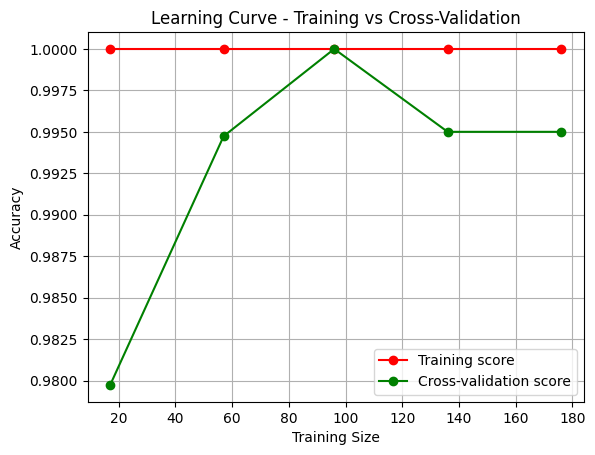

In [9]:
# Curva de aprendizaje del entrenamiento vs validación cruzada
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, test_scores = learning_curve(model_rl, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve - Training vs Cross-Validation')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

### Act 03 - **Evaluación del Modelo**

En el desarrollo de modelos de inteligencia artificial, las métricas de aprendizaje son herramientas fundamentales para evaluar el desempeño y la capacidad de generalización de los algoritmos entrenados. A través de ellas, es posible determinar qué tan bien un modelo logra predecir o clasificar los datos, identificar posibles problemas de sobreajuste o subajuste, y comparar de manera objetiva diferentes enfoques de modelado.

In [10]:
# 6. Evaluación del modelo en el conjunto de entrenamiento
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_train = model_rl.predict(X_train)

In [11]:
# 7. Evaluación final en el conjunto de prueba
y_pred_test = model_rl.predict(X_test)

Las métricas de evaluación permiten medir el rendimiento real del modelo tanto en los datos de entrenamiento como en los de prueba.

Entre las métricas más utilizadas se encuentran la exactitud (accuracy), la precisión (precision), la exhaustividad o sensibilidad (recall), y la medida F1 (F1-score), cada una de las cuales ofrece una perspectiva distinta sobre el desempeño del modelo. En problemas de clasificación binaria o multiclase, estas métricas permiten analizar los aciertos, errores y desequilibrios entre las clases.

**Accuracy (Exactitud)**: Proporción total de predicciones correctas y se utiliza cuando las clases están balanceadas.

$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

In [12]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Precisión en el conjunto de entrenamiento: {accuracy_train}")

Precisión en el conjunto de entrenamiento: 1.0


In [13]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Precisión en el conjunto de prueba: {accuracy_test}")

Precisión en el conjunto de prueba: 1.0


**Precision (Precisión):** Mide la proporción de verdaderos positivos entre todas las predicciones positivas y se utiliza cuando es costoso clasificar falsos positivos (por ejemplo, en fraude o spam).

$$ \text{Precision} = \frac{TP}{TP + FP} $$

In [14]:
precision_train = precision_score(y_train, y_pred_train)
print(f"Precisión en el conjunto de entrenamiento: {precision_train}")

Precisión en el conjunto de entrenamiento: 1.0


In [15]:
precision_test = precision_score(y_test, y_pred_test)
print(f"Precisión en el conjunto de prueba: {precision_test}")

Precisión en el conjunto de prueba: 1.0


**Recall (Sensibilidad o Exhaustividad)** Evalúa la capacidad del modelo para detectar correctamente los casos positivos reales y se utiliza cuando es crítico no omitir positivos (por ejemplo, detección de enfermedades).

$$ \text{Recall} = \frac{TP}{TP + FN} $$

In [16]:
recall_train = recall_score(y_train, y_pred_train)
print(f"Recall en el conjunto de entrenamiento: {recall_train}")

Recall en el conjunto de entrenamiento: 1.0


In [17]:
recall_test = recall_score(y_test, y_pred_test)
print(f"Recall en el conjunto de prueba: {recall_test}")

Recall en el conjunto de prueba: 1.0


**F1-Score** Es el promedio armónico entre precisión y recall, equilibrando ambos y se utiliza cuando hay clases desbalanceadas.

$$ F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [18]:
f1_score_train = f1_score(y_train, y_pred_train)
print(f"F1-Score en el conjunto de entrenamiento: {f1_score_train}")

F1-Score en el conjunto de entrenamiento: 1.0


In [19]:
f1_score_test = f1_score(y_test, y_pred_test)
print(f"F1-Score en el conjunto de prueba: {f1_score_test}")

F1-Score en el conjunto de prueba: 1.0


| Concepto                      | Descripción                                                                                                                                                                                                                       |
| ----------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Subajuste (Underfitting)**  | El modelo **no aprende lo suficiente**. Tiene bajo desempeño tanto en entrenamiento como en validación/prueba. Es demasiado simple para captar los patrones de los datos.                                                         |
| **Sobreajuste (Overfitting)** | El modelo **aprende demasiado los datos de entrenamiento**, incluyendo ruido y detalles irrelevantes. Tiene un desempeño excelente en entrenamiento, pero **malo en validación o prueba**, lo que indica **mala generalización**. |


| **Situación**                        | **Entrenamiento** | **Validación Cruzada / Test** | **Diagnóstico**                                                             |
| :----------------------------------- | :---------------: | :---------------------------: | :-------------------------------------------------------------------------- |
| 🔴 **Subajuste**                     | Bajo (ej. < 0.80) |       Bajo (ej. < 0.80)       | El modelo no aprende lo suficiente; tiene baja capacidad de representación. |
| 🟡 **Casi Subajuste**                | Medio (0.80–0.90) |    Medio o bajo (0.70–0.85)   | El modelo necesita más complejidad o ajustes en hiperparámetros.            |
| 🟢 **Buen ajuste (Generaliza bien)** |   Alto (≥ 0.90)   |        Similar (±0.03)        | Buen equilibrio entre aprendizaje y generalización.                         |
| 🔴 **Sobreajuste**                   |  Muy alto (≈1.00) |    Mucho menor (ej. < 0.90)   | El modelo memorizó los datos; no generaliza a nuevos ejemplos.              |


In [20]:
# Determinar si hay sobreajuste o subajuste
if accuracy_train > accuracy_test + 0.05:
    print("\nDiagnóstico: El modelo presenta POSIBLE SOBREAJUSTE.")
elif accuracy_test > accuracy_train + 0.05:
    print("\nDiagnóstico: El modelo presenta POSIBLE SUBAJUSTE.")
else:
    print("\nDiagnóstico: El modelo está razonablemente bien ajustado.")


Diagnóstico: El modelo está razonablemente bien ajustado.


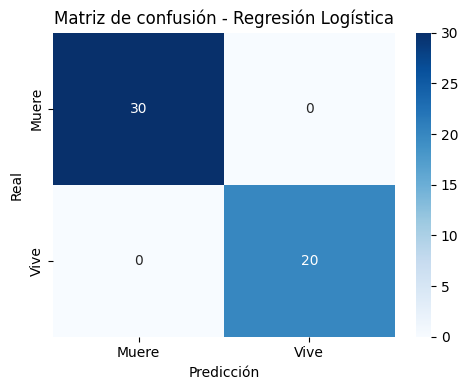

In [21]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Muere', 'Vive'],
    yticklabels=['Muere', 'Vive']
)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Regresión Logística')
plt.tight_layout()
plt.show()

### Act 04 - **Predicción Futura**

Ejemplo 01

In [22]:
# Datos de un nuevo paciente para predicción
paciente_nuevo = {
    'Age':	45,
    'Sex_encoded':	1,  # Masculino
    'Estado Civil_encoded':	0,  # Casado
    'Ciudad_encoded':	0,  # Bogota
    'Steroid':	1,
    'Antivirals':	2,
    'Fatigue':	2,
    'Malaise':	2,
    'Anorexia':	2,
    'Liver Big':	1,
    'Liver Firm': 2,
    'Spleen Palpable':	2,
    'Spiders':	2,
    'Ascites':	2,
    'Varices':	2,
    'Bilirubin':	1,
    'Alk Phosphate':	100,
    'Sgot':	18,
    'Albumin':	4,
    'Protime':	50,
    'Histology': 1
}

In [23]:
# Escalar y preparar los datos del nuevo paciente
import joblib
scaler = joblib.load('scaler.pkl')
nuevo_df = pd.DataFrame([paciente_nuevo])
nuevo_df_scaled = scaler.transform(nuevo_df)
nuevo_df_scaled

c:\Python312\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array([[ 0.14538825,  0.26375219, -1.18621648, -1.37000009, -0.95677078,
         0.46024196,  1.81147421,  1.11173222,  0.65287086, -2.86206463,
         0.75862099,  0.62608394,  1.00297384,  0.61860392,  0.53339831,
        -0.53725738,  0.1030242 , -1.25619345,  0.663224  , -0.17374941,
        -0.97590007]])

In [24]:
# Asignar los nombres de las columnas del modelo
nuevo_df_scaled = pd.DataFrame(nuevo_df_scaled)
nuevo_df_scaled.columns = X.columns

In [32]:
# Predicción para el nuevo paciente
prediccion_nuevo = model_rl.predict(nuevo_df_scaled)
estado = 'Vive' if prediccion_nuevo[0] == 1 else 'Muere'
# Porcentaje de probabilidad de vive y muere
probabilidades = model_rl.predict_proba(nuevo_df_scaled)
probabilidad_vive = probabilidades[0][0] * 100
probabilidad_muere = probabilidades[0][1] * 100

print(f"La predicción para el nuevo paciente es: {estado}")
print(f"Probabilidad de que el paciente viva: {probabilidad_vive:.2f}%")
print(f"Probabilidad de que el paciente muera: {probabilidad_muere:.2f}%")


La predicción para el nuevo paciente es: Muere
Probabilidad de que el paciente viva: 32.37%
Probabilidad de que el paciente muera: 67.63%


Ejemplo 2

In [26]:
otro_paciente = [ 0.14538825,  0.26375219, -1.18621648, -1.37000009, -0.95677078,
         0.46024196,  1.81147421,  1.11173222,  0.65287086, -2.86206463,
         0.75862099,  0.62608394,  1.00297384,  0.61860392,  0.53339831,
        -0.53725738,  0.1030242 , -1.25619345,  0.663224  , -0.17374941,
        -0.97590007]


prediccion_otro = model_rl.predict([otro_paciente])
estado_otro = 'Vive' if prediccion_otro[0] == 1 else 'Muere'
print(f"La predicción para el otro paciente es: {estado_otro}")

La predicción para el otro paciente es: Muere


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Act 05 - **Exportar el Modelo**

In [27]:
# Exportar el modelo entrenado
from flask import json
import joblib

joblib.dump(model_rl, 'modelo_regresion_logistica.pkl')

model_info = {
    "modelo": "Regresión Logística",
    "random_state": RANDOM_SEED,
    "max_iter": 1000,
    "metricas_train": {
        "accuracy": float(accuracy_train),
        "precision": float(precision_train),
        "recall": float(recall_train),
        "f1": float(f1_score_train)
    },
    "metricas_test": {
        "accuracy": float(accuracy_test),
        "precision": float(precision_test),
        "recall": float(recall_test),
        "f1": float(f1_score_test),
    },
    "n_features": int(X_train.shape[1]),
    "features": list(X.columns)
}

with open("modelo_regresion_logistica_info.json", "w", encoding="utf-8") as f:
    json.dump(model_info, f, indent=4, ensure_ascii=False)